In [1]:
import matplotlib.pyplot as plt
import re
import os
import sys
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped")
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_fewtraj")

import numpy as np
from scipy.stats import norm
from settings_and_potential import *
font_size=35
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size*0.8) 
plt.rc('ytick', labelsize=font_size*0.8) 
# nrank = sys.argv[0]
range_bins=[-3,3]
tau=0.1
s=1

In [2]:
m1=1/1.5         #  // minimum step scale factor
M1=1./2.2             # // maximum step scale factor
numsam=5     #      // number of sample
dt=0.01 #
tau=0.1   #
T=1000
numruns=int(100/dt)  #       // total number of trajectories
print(numruns)

10000


## Double well 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: 'figures/doublewell_potential.eps'

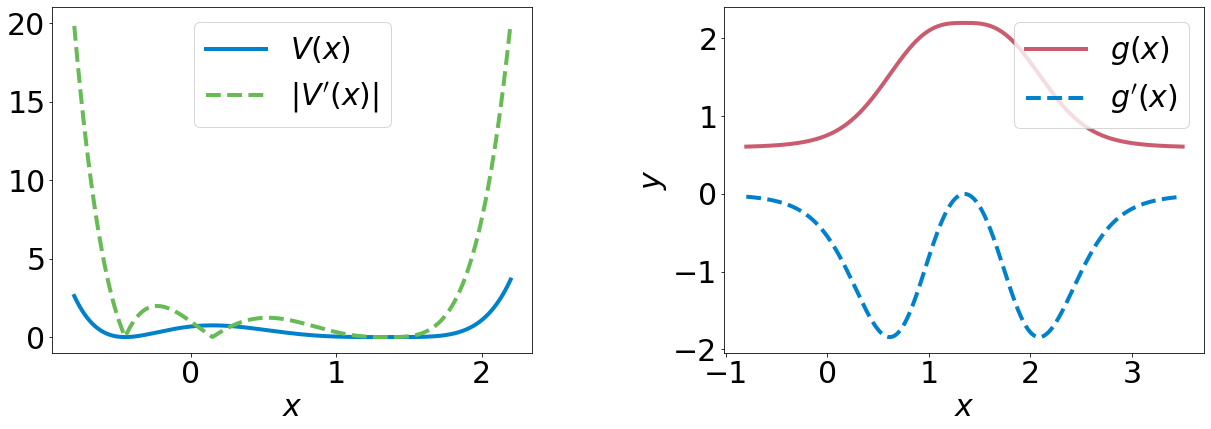

In [3]:
### Plot parameters: 
font_size = 30
line_w=4
c=1.35
a=0.45
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

########################################

def U(x):
    res= ((x+a)*(x+a)-0.0001)*np.power((x-c),4)
    return res

def Up(x):
    xc =x-c
    xa=x+a
    v=2*xc*xc*xc*(xa*xc+2*xa*xa-0.0002)
    return v


def getg(x):
    # double xc,xa,f,f2,xi,den,g;
    xc=x-c
    xa=x+a
    f=0.5*np.abs(np.power(xc,3))
    f2=f*f;
    xi=np.sqrt(1+m1*f2)
    den=M1*xi+f
    g=xi/den
    return(g)

def getgprime(x):
    xc=x-c
    xa=x+a
    f=0.5*np.abs(np.power(xc,3))
    f2=f*f
    fp=1.5*np.power(xc,2)*f/np.abs(f)
    xi=np.sqrt(1+m1*f2)
    gp=-xi*xi*fp/(np.power(xi,3)*np.power(M1*xi+f,2))
    return(gp)

    
fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
s=np.linspace(-0.8,2.2,1000)


axs[0].plot(s,U(s),label="$V(x)$",linewidth=line_w,color=myblue)
axs[0].plot(s,np.abs(Up(s)),"--",label="$|V'(x)|$",linewidth=line_w,color=mygreen)

# axs[0].plot(s,omega(s),"--",label="$\\omega(x)$",linewidth=line_w,color=mygreen)
axs[0].legend(loc = "upper center",fontsize=font_size)
axs[0].set_xlabel("$x$",fontsize=font_size)
s=np.linspace(-0.8,3.5,1000)

# axs[1].plot(s,np.abs(Up(s)),"--",label="$|V'(x)|$",linewidth=line_w,color=mygreen)
axs[1].plot(s,np.abs(getg(s)),color=myred,linewidth=line_w,label="$g(x)$")
axs[1].plot(s,(getgprime(s)),"--",color=myblue,linewidth=line_w,label="$g'(x)$")

# axs[1].semilogy(s,np.abs(Up(s)),"--",label="$|V'(x)|$",linewidth=line_w,color=myblue)
# axs[1].semilogy(s,np.abs(getg(s)),color=myred,linewidth=line_w,label="$g(x)$")
axs[1].legend(loc = "upper right",fontsize=font_size)

# def ticks(y, pos):
#     return r'$2^{:.0f}$'.format(np.log(y))

# # axs[1].xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
# axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(ticks))


# axs[1].set_ylabel("$\\log_e(|x|)$",fontsize=font_size)
axs[1].set_xlabel("$x$",fontsize=font_size)
axs[1].set_ylabel("$y$",fontsize=font_size)

plt.savefig('figures/doublewell_potential.eps', format='eps')

## Anisotropic


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


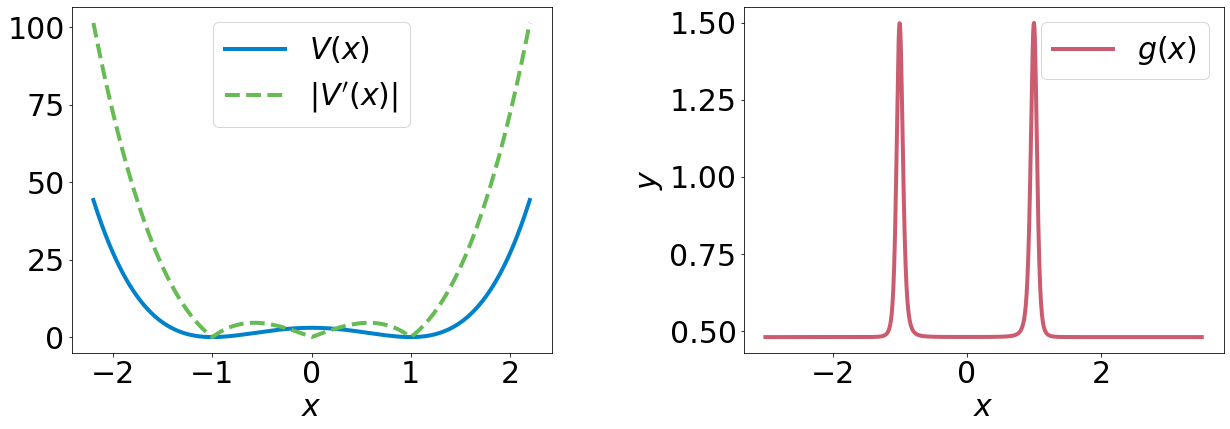

In [4]:
### Plot parameters: 
font_size = 30
line_w=4
c=1.35
a=0.45
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

########################################
s=3
m1=0.5
M1=1/1.5
c=10

def U(x):
    res= s*(x*x-1)*(x*x-1)
    return res

def Up( x):
    res=4*s*x*(x*x-1);
    return res


def getg(x):
    # double xc,xa,f,f2,xi,den,g;
    xp1=x+1
    xm1=x-1
    f=(c*s*xp1*xp1*xm1*xm1)
    f2=f*f;
    xi=np.sqrt(1+m1*f2)
    den=M1*xi+f
    g=xi/den
    return(g)

def getgprime(x):
    xc=x-1
    xa=x+1
    f=c*s*xa*xa*xc*xc
    f2=f*f
    fp=c*4*s*(x*x-1)*x
    xi=np.sqrt(1+m1*f2)
    gp=-xi*xi*fp/(np.power(xi,3)*np.power(M1*xi+f,2))
    return(gp)

    
fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
xl=np.linspace(-2.2,2.2,1000)


axs[0].plot(xl,U(xl),label="$V(x)$",linewidth=line_w,color=myblue)
axs[0].plot(xl,np.abs(Up(xl)),"--",label="$|V'(x)|$",linewidth=line_w,color=mygreen)

# axs[0].plot(s,omega(s),"--",label="$\\omega(x)$",linewidth=line_w,color=mygreen)
axs[0].legend(loc = "upper center",fontsize=font_size)
axs[0].set_xlabel("$x$",fontsize=font_size)
xl=np.linspace(-3.,3.5,1000)

axs[1].plot(xl,(getg(xl)),color=myred,linewidth=line_w,label="$g(x)$")
# axs[1].plot(xl,(getgprime(xl)),"--",color=myblue,linewidth=line_w,label="$g'(x)$")

axs[1].legend(loc = "upper right",fontsize=font_size)

axs[1].set_xlabel("$x$",fontsize=font_size)
axs[1].set_ylabel("$y$",fontsize=font_size)
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
plt.savefig('figures/anisotropic.eps', format='eps')

In [5]:
m1=0.1      #  // minimum step scale factor
M1=1./3             # // maximum step scale factor
numsam=5     #      // number of sample
dt=0.015 #
tau=0.1   #
T=1000
numruns=int(T/dt)  #       // total number of trajectories
t=np.linspace(0,numruns*dt+dt,numruns+1)

1.1945921987040065
1.1961683354883226
1.1947672124739375
1.1947015650471748


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.1963809567402162


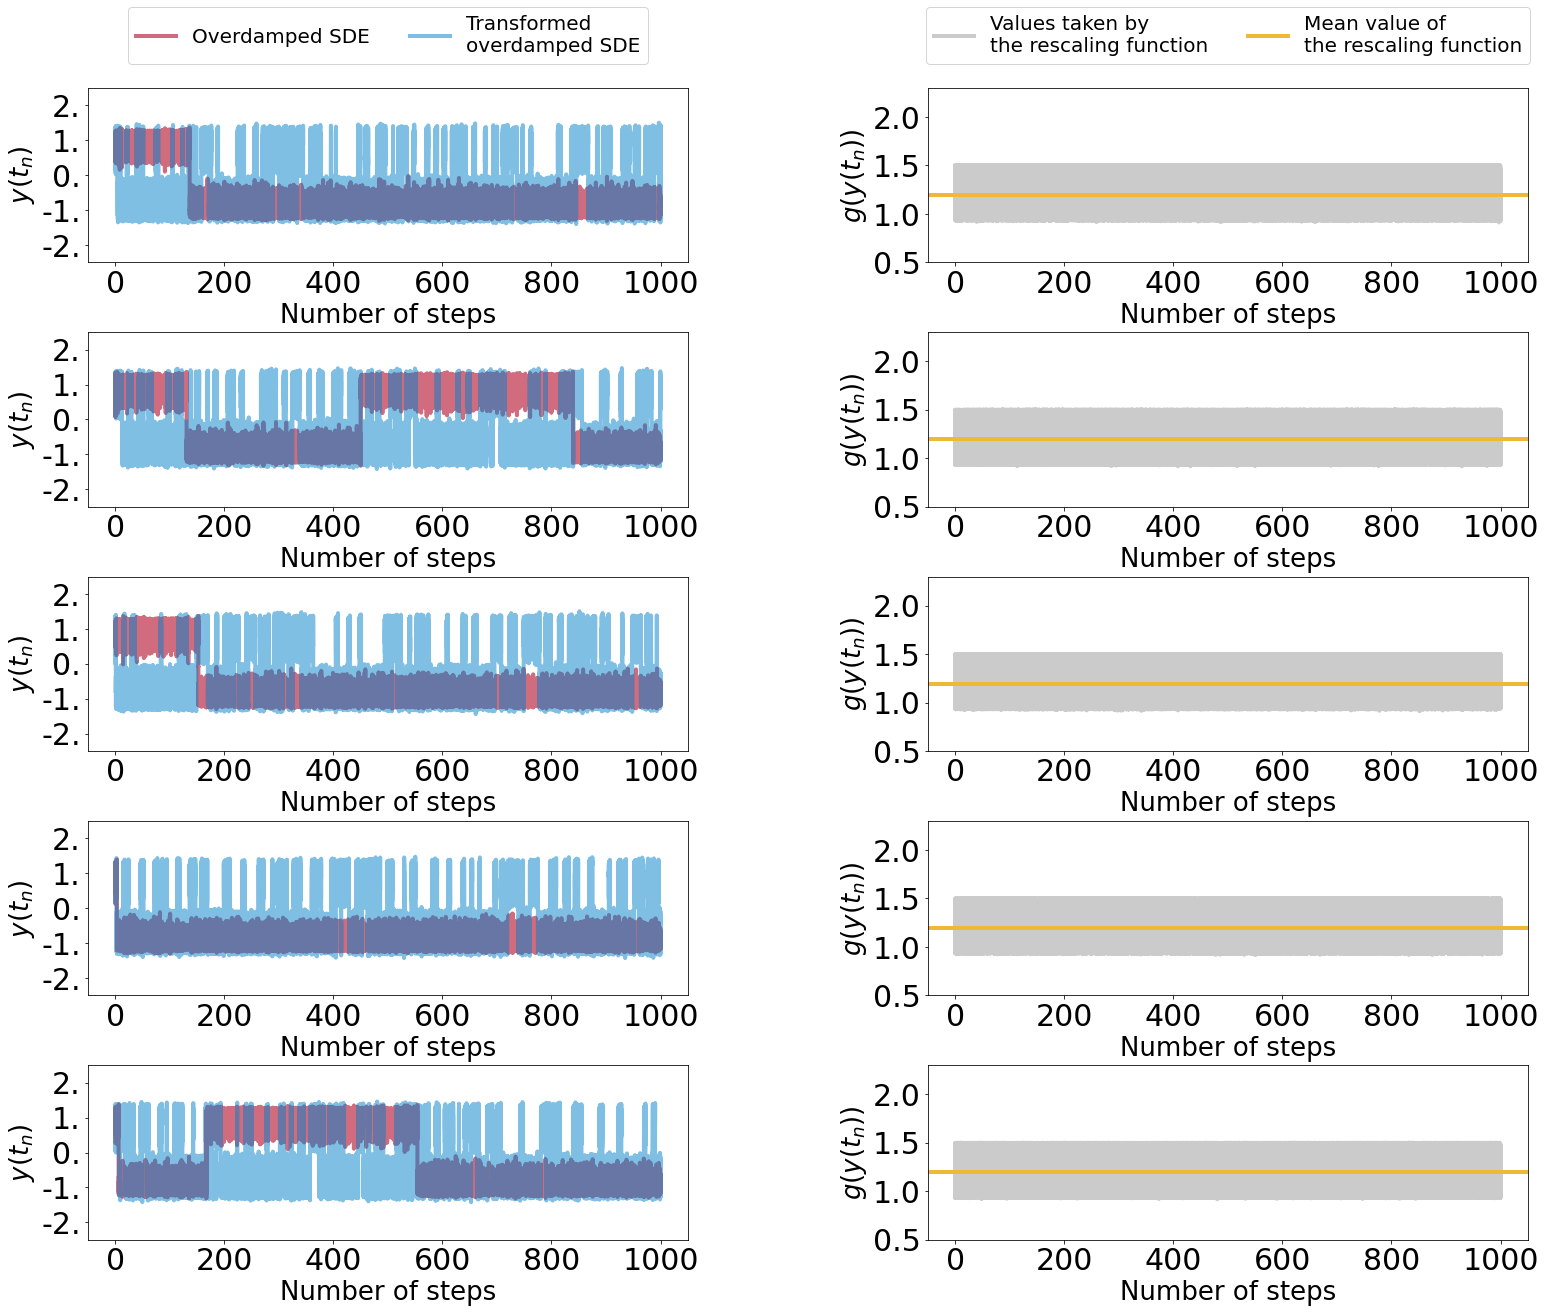

In [7]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_fewtraj")

fig,((axs))= plt.subplots(numsam,2,figsize=(25,20))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

for i in range(numsam):
    filename= "vec_noada"+str(i)+".txt"
    q_noada,p_noada,g=openCfile_y(filename)
    filename= "vec_tr"+str(i)+".txt"
    q_tr,p_tr,g=openCfile_y(filename)

    # vec g 
    filename= "vec_g"+str(i)+".txt"
    gvals,p_noada,g=openCfile_y(filename)
  

    ## dont take the last value 
    q_tr=q_tr[0:-1]
    q_noada=q_noada[0:-1]
    gvals=gvals[0:-1]
    t=np.linspace(0,numruns*dt+dt,numruns+1)


    # Q
    ###6
    axs[i,0].plot(t,q_noada,linewidth=lw,alpha=0.9,label='Overdamped SDE',color=myred)
    axs[i,0].plot(t,q_tr,linewidth=lw,alpha=0.5,label='Transformed\noverdamped SDE',color=myblue)
    axs[i,0].set_ylim(-2.5,2.5)
    axs[i,0].set_ylabel("$y(t_n)$", fontsize=font_size*1.3)
    axs[i,0].set_xlabel("Number of steps", fontsize=font_size*1.3)
    ylabval=[-2.,-1.,0.,1.,2.]
    labels = ["-2.","-1.","0.","1.","2."]
    axs[i,0].set_yticks(ylabval, labels,fontsize=font_size*1.5)
   


    ############
    ## Values of g vals ## 
    ############
    range_bins_g=[0,2.5+0.1]
    # print()
    # histogram_g,bins = np.histogram(gvals,bins=nbins,range=range_bins_g, density=True)
    # midx_noada = (bins[0:-1]+bins[1:])/2
    # mean_g=round(np.mean(g),2)
    # print(mean_g)
    axs[i,1].plot(t,gvals,linewidth=lw,label='Values taken by\nthe rescaling function',color=mygrey)
    axs[i,1].axhline(np.mean(gvals),linewidth=lw,label='Mean value of\nthe rescaling function',color=myyellow)
    print(np.mean(gvals))
    axs[i,1].set_ylim(0.5,2.3)
    axs[i,1].set_ylabel("$g(y(t_n))$", fontsize=font_size*1.3)
    axs[i,1].set_xlabel("Number of steps", fontsize=font_size*1.3)

    ylabval=[0.5,1.,1.5,2.]
    labels = ["0.5","1.0","1.5","2.0"]
    axs[i,1].set_yticks(ylabval, labels,fontsize=font_size*1.5)
   

    # axs[i,2].legend(fontsize=font_size, loc="upper center")

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.52))
axs[0,1].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.52))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
fig.savefig("figures/chains_anisotropic_model.eps",dpi=1000)
fig.savefig("figures/chains_anisotropic_model.pdf")

